# GAN Training

## imports

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

from models.GAN_ELE import GAN
from utils.loaders import load_safari

Using TensorFlow backend.


In [2]:
RUN_ID = '0011'
RUN_FOLDER = os.path.join("./run", RUN_ID)

## data

In [3]:
(x_train, y_train) = load_safari('camel')

## architecture

In [4]:
x_train.shape

(80000, 28, 28, 1)

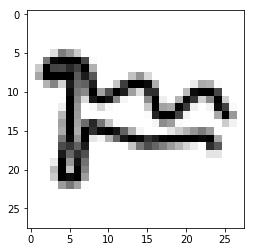

In [14]:
plt.imshow(x_train[0,:,:,0], cmap = 'gray_r')

In [6]:
np.min(x_train[0])

0.0

In [7]:
INPUT_DIM = (28,28,1)

CONV_FILTERS = [64,64,128,128]
CONV_KERNEL_SIZES = [5,5,5,5]
CONV_STRIDES = [2,2,2,1]
CONV_PADDINGS = ['same', 'same', 'same', 'same']

CONV_T_FILTERS = [128,64, 64,1]
CONV_T_KERNEL_SIZES = [5,5,5,5]
CONV_T_STRIDES = [1,1,1,1]
CONV_T_PADDINGS = ['same','same','same','same']

Z_DIM = 100


In [8]:
gan = GAN(INPUT_DIM
                , CONV_FILTERS
                , CONV_KERNEL_SIZES
                , CONV_STRIDES
                , CONV_PADDINGS
                , CONV_T_FILTERS
                , CONV_T_KERNEL_SIZES
                , CONV_T_STRIDES
                , CONV_T_PADDINGS
                , Z_DIM
                 )

gan.save(RUN_FOLDER)

In [9]:
#gan.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))

In [10]:
gan.discriminator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
discriminator_input (InputLa (None, 28, 28, 1)         0         
_________________________________________________________________
discriminator_conv_0 (Conv2D (None, 14, 14, 64)        1664      
_________________________________________________________________
activation_1 (Activation)    (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
discriminator_conv_1 (Conv2D (None, 7, 7, 64)          102464    
_________________________________________________________________
activation_2 (Activation)    (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 64)          0         
__________

/Users/davidfoster/.virtualenvs/gdl/lib/python3.6/site-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


In [11]:
gan.generator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
generator_input (InputLayer) (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 3136)              316736    
_________________________________________________________________
batch_normalization_1 (Batch (None, 3136)              12544     
_________________________________________________________________
activation_5 (Activation)    (None, 3136)              0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 14, 14, 64)        0         
__________

## training

In [12]:
BATCH_SIZE = 128
EPOCHS = 6000
PRINT_EVERY_N_BATCHES = 10
INITIAL_EPOCH = 0

In [13]:
gan.train(     
    x_train
    , batch_size = BATCH_SIZE
    , epochs = 6000
    , run_folder = RUN_FOLDER
    , print_every_n_batches = PRINT_EVERY_N_BATCHES
    , initial_epoch = INITIAL_EPOCH
    ,discriminator_training_loops = 1
)

0 [D loss: 0.696314] [G loss: 1.513349]
1 [D loss: 0.796233] [G loss: 0.669560]
2 [D loss: 0.668781] [G loss: 0.522640]
3 [D loss: 0.739252] [G loss: 0.702309]
4 [D loss: 0.640991] [G loss: 0.531736]
5 [D loss: 0.587770] [G loss: 0.746495]
6 [D loss: 0.494699] [G loss: 0.206667]
7 [D loss: 0.977221] [G loss: 0.922132]
8 [D loss: 0.603177] [G loss: 0.977096]
9 [D loss: 0.495747] [G loss: 0.892973]
10 [D loss: 0.532542] [G loss: 0.831562]
11 [D loss: 0.401092] [G loss: 0.844649]
12 [D loss: 0.350743] [G loss: 1.099344]
13 [D loss: 0.343176] [G loss: 0.647866]
14 [D loss: 1.105895] [G loss: 1.119429]
15 [D loss: 0.532919] [G loss: 0.987632]
16 [D loss: 0.512992] [G loss: 1.219846]
17 [D loss: 0.442277] [G loss: 1.388048]
18 [D loss: 0.412155] [G loss: 5.202266]
19 [D loss: 2.683417] [G loss: 0.868209]
20 [D loss: 0.506754] [G loss: 0.658244]
21 [D loss: 0.653667] [G loss: 0.793266]
22 [D loss: 0.591293] [G loss: 0.914239]
23 [D loss: 0.557957] [G loss: 1.077663]
24 [D loss: 0.521903] [G l

198 [D loss: 0.820517] [G loss: 1.783270]
199 [D loss: 0.545271] [G loss: 1.163318]
200 [D loss: 0.450629] [G loss: 1.261792]
201 [D loss: 0.444586] [G loss: 1.378420]
202 [D loss: 0.447525] [G loss: 1.798713]
203 [D loss: 0.426573] [G loss: 1.443964]
204 [D loss: 0.477271] [G loss: 1.818079]
205 [D loss: 0.468283] [G loss: 1.008644]
206 [D loss: 0.459495] [G loss: 2.167831]
207 [D loss: 0.471352] [G loss: 0.813079]
208 [D loss: 0.602740] [G loss: 2.168091]
209 [D loss: 0.540480] [G loss: 0.924084]
210 [D loss: 0.515544] [G loss: 1.708236]
211 [D loss: 0.449996] [G loss: 1.279569]
212 [D loss: 0.432540] [G loss: 1.756356]
213 [D loss: 0.446613] [G loss: 1.238689]
214 [D loss: 0.403760] [G loss: 1.872491]
215 [D loss: 0.443696] [G loss: 1.393434]
216 [D loss: 0.449501] [G loss: 2.228524]
217 [D loss: 0.423603] [G loss: 0.949734]
218 [D loss: 0.566973] [G loss: 2.509978]
219 [D loss: 0.593490] [G loss: 0.917234]
220 [D loss: 0.549214] [G loss: 1.766102]
221 [D loss: 0.515132] [G loss: 1.

394 [D loss: 0.424632] [G loss: 1.523492]
395 [D loss: 0.365450] [G loss: 1.921022]
396 [D loss: 0.388012] [G loss: 1.385487]
397 [D loss: 0.426137] [G loss: 2.905711]
398 [D loss: 0.559021] [G loss: 1.012742]
399 [D loss: 0.563862] [G loss: 2.199816]
400 [D loss: 0.500930] [G loss: 1.391890]
401 [D loss: 0.442816] [G loss: 1.811485]
402 [D loss: 0.470199] [G loss: 1.263982]
403 [D loss: 0.439131] [G loss: 1.563726]
404 [D loss: 0.427140] [G loss: 1.480453]
405 [D loss: 0.429598] [G loss: 1.768553]
406 [D loss: 0.348121] [G loss: 1.754399]
407 [D loss: 0.446338] [G loss: 1.713839]
408 [D loss: 0.385159] [G loss: 1.765837]
409 [D loss: 0.405071] [G loss: 1.685676]
410 [D loss: 0.478101] [G loss: 2.090763]
411 [D loss: 0.405052] [G loss: 1.255678]
412 [D loss: 0.590719] [G loss: 2.773008]
413 [D loss: 0.641694] [G loss: 1.113344]
414 [D loss: 0.491963] [G loss: 1.835737]
415 [D loss: 0.464284] [G loss: 1.308913]
416 [D loss: 0.422584] [G loss: 1.736901]
417 [D loss: 0.418343] [G loss: 1.

KeyboardInterrupt: 

In [15]:
for i in range(10):
    print(gan.discriminator.predict(np.array([x_train[i]]))[0])

[0.89452]
[0.9135624]
[0.8444373]
[0.617947]
[0.6158441]
[0.21588135]
[0.7526824]
[0.4391292]
[0.884499]
[0.9719837]


(28, 28, 1)


array([0.20445967], dtype=float32)

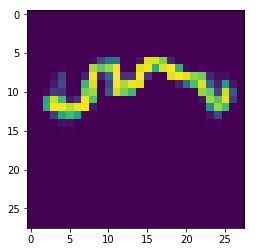

In [24]:
noise = np.random.uniform(-1, 1, 100)
img = gan.generator.predict(np.array([noise]))[0]

print(img.shape)
plt.imshow(img[:,:,0])

gan.discriminator.predict(np.array([img]))[0]

In [ ]:
len(gan.discriminator.get_weights())

In [ ]:
gan.model.summary()

In [ ]:
gan.discriminator.layers

In [ ]:
pointer = 0
for x, y in enumerate(gan.discriminator.layers):
    
    print(y)
    print(y.trainable)
    for i in gan.discriminator.layers[x].get_weights():
        
        print(pointer)
        print(i.shape)
        pointer+=1
        
        

In [ ]:
len(gan.discriminator.get_weights())

In [ ]:
gan.discriminator.get_weights()[2]

In [ ]:
gan.discriminator.get_weights()[22]

In [ ]:
x_train[0][16]

In [ ]:
gan.model.save_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))